# Copyright

<PRE>
Jelen Jupyter notebook a Budapesti Műszaki és Gazdaságtudományi Egyetemen tartott "Deep Learning a gyakorlatban Python és LUA alapon" tantárgy segédanyagaként készült. 
A tantárgy honlapja: http://smartlab.tmit.bme.hu/oktatas-deep-learning
Deep Learning kutatás: http://smartlab.tmit.bme.hu/deep-learning

A notebook bármely részének újra felhasználása, publikálása csak a szerzők írásos beleegyezése esetén megegengedett.

2019 (c) Gyires-Tóth Bálint (toth.b kukac tmit pont bme pont hu)
</PRE>

# MNIST adatbázis tanítása MLP-vel

Először hozzuk létre a hálózatot:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

nb_classes = 10

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), 
              metrics=['accuracy'])



Using TensorFlow backend.


Ezt követően töltsük be az MNIST adatbázist:

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
X_train = X_train.reshape(60000, -1)
X_test = X_test.reshape(10000, -1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Put everything on grayscale
X_train /= 255
X_test /= 255

# a kimenetet onehot kódolásúvá alakítjuk
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(np.asarray(range(nb_classes)))
print(Y_train[0].astype(np.int))


(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 0 0 0 0]


[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

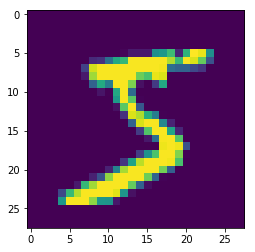

In [6]:
print(X_train[0])
plt.imshow(X_train[0].reshape(28, 28))

Majd tanítsuk be a modellünket. Most nem határoztunk meg külön validációs adatbázist, hanem a model.fit függvény validation_split paramétereként adjuk meg, hogy hány százalékot használjon fel validációs célokra a tanítás:

In [38]:
network_history = model.fit(X_train, Y_train, batch_size=128, 
                            epochs=30, verbose=1, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 8s 158us/step - loss: 0.4748 - acc: 0.8799 - val_loss: 0.4354 - val_acc: 0.8933
Epoch 2/30
48000/48000 [==============================] - 8s 157us/step - loss: 0.4604 - acc: 0.8817 - val_loss: 0.4227 - val_acc: 0.8952
Epoch 3/30
48000/48000 [==============================] - 8s 160us/step - loss: 0.4475 - acc: 0.8845 - val_loss: 0.4113 - val_acc: 0.8962
Epoch 4/30
48000/48000 [==============================] - 9s 191us/step - loss: 0.4361 - acc: 0.8861 - val_loss: 0.4012 - val_acc: 0.8980
Epoch 5/30
48000/48000 [==============================] - 9s 182us/step - loss: 0.4257 - acc: 0.8881 - val_loss: 0.3921 - val_acc: 0.8993
Epoch 6/30
48000/48000 [==============================] - 7s 139us/step - loss: 0.4164 - acc: 0.8899 - val_loss: 0.3838 - val_acc: 0.9007
Epoch 7/30
48000/48000 [==============================] - 7s 141us/step - loss: 0.4079 - acc: 0.8916 - val_loss: 0.3765 - 

Ezután jelenítsük meg, a tanítás során a hibát és a pontosságot a tanító és validációs adatokon:

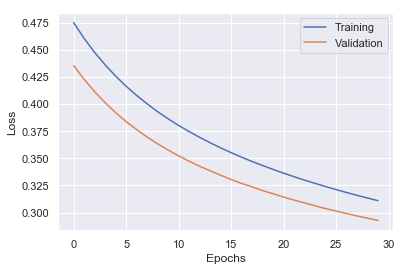

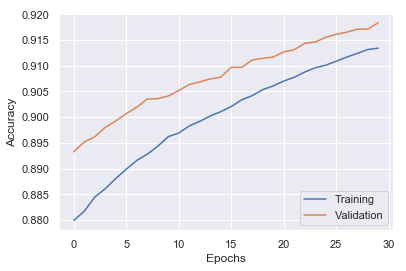

In [39]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['acc'])
    plt.plot(network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

# Hálózat vizsgálata

In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:
print('Bemenet: ', model.input)

Bemenet:  Tensor("dense_1_input:0", shape=(?, 784), dtype=float32)


In [32]:
print('Rétegek:\n')
for layer in model.layers:
    print("Réteg neve: ", layer.name, ', tanítható: ', layer.trainable)
    print(layer.get_config(),'\n')

Rétegek:

Réteg neve:  dense_1 , tanítható:  True
{'name': 'dense_1', 'batch_input_shape': (None, 784), 'use_bias': True, 'bias_regularizer': None, 'kernel_initializer': {'config': {'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None, 'scale': 1.0}, 'class_name': 'VarianceScaling'}, 'kernel_constraint': None, 'bias_constraint': None, 'dtype': 'float32', 'activity_regularizer': None, 'activation': 'relu', 'bias_initializer': {'config': {}, 'class_name': 'Zeros'}, 'units': 512, 'trainable': True, 'kernel_regularizer': None} 

Réteg neve:  dense_2 , tanítható:  True
{'name': 'dense_2', 'use_bias': True, 'bias_regularizer': None, 'kernel_initializer': {'config': {'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None, 'scale': 1.0}, 'class_name': 'VarianceScaling'}, 'kernel_constraint': None, 'bias_constraint': None, 'activity_regularizer': None, 'activation': 'relu', 'bias_initializer': {'config': {}, 'class_name': 'Zeros'}, 'units': 512, 'trainable': True, 'kernel_regularizer'

In [33]:
print('Kimenet: ', model.output)

Kimenet:  Tensor("dense_3/Softmax:0", shape=(?, 10), dtype=float32)


# Predikció és tévesztési mátrix

In [22]:
preds=model.predict(X_test)

In [23]:
print(preds.shape)

(10000, 10)


In [24]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test,np.argmax(preds,axis=1))

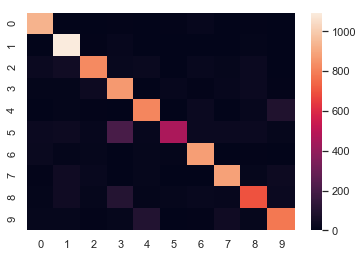

In [25]:
import seaborn as sns; sns.set()
sns.heatmap(conf)